In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import math
from sklearn import preprocessing
# Adjusting the size of matplotlib
import matplotlib as mpl
import datetime

In [5]:
yf.pdr_override()
df_full = pdr.get_data_yahoo("AAPL", start="2009-01-01").reset_index()
# df_full.to_csv('output/AAPL.csv',index=False)
df_full.head()

[*********************100%***********************]  1 of 1 downloaded


,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-12-31,12.28,12.53,12.19,12.19,10.64,151885300
1,2009-01-02,12.27,13.01,12.17,12.96,11.31,186503800
2,2009-01-05,13.31,13.74,13.24,13.51,11.79,295402100
3,2009-01-06,13.71,13.88,13.20,13.29,11.60,322327600
4,2009-01-07,13.12,13.21,12.89,13.00,11.35,188262200


# Plot Moving Average¶

Rollin mean/Moving Average smoothsout our price data by creating a constantly updated average price



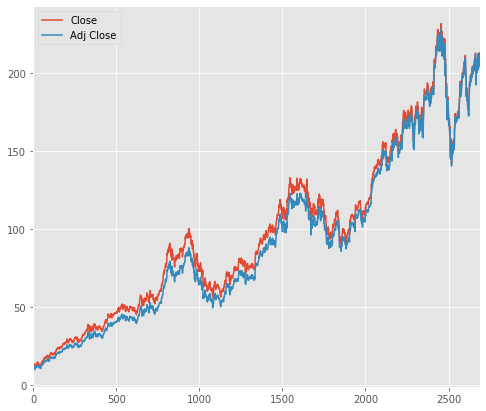

In [6]:
adj_close_px = df_full['Adj Close']
close_px = df_full['Close']
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='Close')
adj_close_px.plot(label='Adj Close')
plt.legend()

In [7]:

close_px = df_full['Close']
mavg = close_px.rolling(window=100).mean()

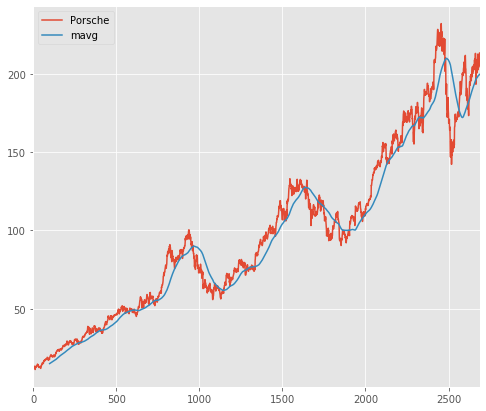

In [8]:
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='Porsche')
mavg.plot(label='mavg')
plt.legend()

# Return Deviation
Expected Return measures the mean, or expected value, of the probability distribution of investment returns.

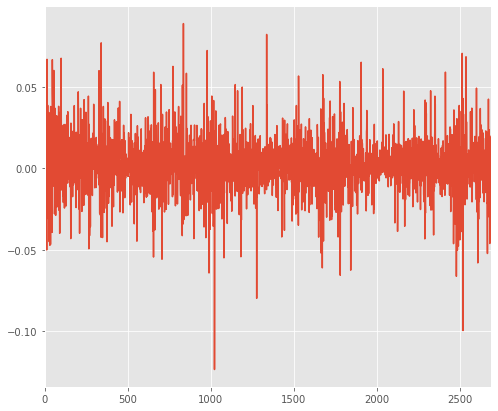

In [9]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

# Predict Stock Prices

df = df_full.loc[:,['Close','Volume']] df['HL_PCT'] = (df_full['High'] - df_full['Low']) / df_full['Close'] * 100.0 df['PCT_change'] = (df_full['Close'] - df_full['Open']) / df_full['Open'] * 100.0

In [10]:
df = df_full.loc[:,['Close','Volume','Low','High','Open']]


# Preprossesing

Drop missing values <br>
Separating the label here, we want to predict the AdjClose <br>
Scale the X so that everyone can have the same distribution for linear regression<br>
Split data into train, validation and test set

In [12]:
# df.fillna(value=-99999, inplace=True)
# Print Data rows which are nan
df[df.isnull().any(axis=1)]

,Close,Volume,Low,High,Open


In [14]:
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Close'
df['label'] = df[forecast_col].shift(-1)
df = df.drop(df[df.isnull().any(axis=1)].index)
X = np.array(df.drop(['label'], 1))

In [15]:
df


,Close,Volume,Low,High,Open,label
0,12.19,151885300,12.19,12.53,12.28,12.96
1,12.96,186503800,12.17,13.01,12.27,13.51
2,13.51,295402100,13.24,13.74,13.31,13.29
3,13.29,322327600,13.20,13.88,13.71,13.00
4,13.00,188262200,12.89,13.21,13.12,13.24
...,...,...,...,...,...,...
2681,204.16,25873300,203.53,208.55,207.86,205.53
2682,205.53,15938800,203.32,205.72,204.10,209.01
2683,209.01,20990500,206.66,209.32,208.50,208.74
2684,208.74,21143400,207.20,210.45,210.16,205.70


In [16]:
# We want to separate 10 percent of the data to forecast
forecast_out = int(math.ceil(0.1 * len(df)))


In [18]:
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

In [19]:
# Split the data into trainings data and test data
X_test = X[-forecast_out:]
X_train = X[:-forecast_out]

In [20]:
# Separate label and identify it as y
y = np.array(df['label'])
y_train = y[:-forecast_out]
y_test = y[-forecast_out:]

# Prediction¶


In [21]:

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## Simple Linear Analysis¶


In [22]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

## Quadratic Discriminant Analysis¶


In [23]:
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [24]:

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

## K Nearest Neighbor¶


In [25]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

# Evaluation¶


In [26]:
df[-forecast_out:]


,Close,Volume,Low,High,Open,label
2417,207.25,22525500,204.52,207.81,206.05,208.88
2418,208.88,23492600,207.20,209.78,209.53,207.53
2419,207.53,24611200,206.67,209.10,207.36,208.87
2420,208.87,25890900,207.70,210.95,209.31,209.75
2421,209.75,20748000,208.26,210.56,210.16,210.24
...,...,...,...,...,...,...
2681,204.16,25873300,203.53,208.55,207.86,205.53
2682,205.53,15938800,203.32,205.72,204.10,209.01
2683,209.01,20990500,206.66,209.32,208.50,208.74
2684,208.74,21143400,207.20,210.45,210.16,205.70


In [27]:
X_test[0]


array([ 2.02023839, -0.97743835,  2.00379205,  1.99772227,  1.99905602])

In [28]:
y_test[0]


208.88

In [29]:
clfreg.predict([X_test[0]])


array([207.29486236])

In [30]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)
# results
print('The linear regression confidence is ', confidencereg)
print('The quadratic regression 2 confidence is ', confidencepoly2)
print('The quadratic regression 3 confidence is ', confidencepoly3)
print('The knn regression confidence is ', confidenceknn)

The linear regression confidence is  0.9693164807427905
The quadratic regression 2 confidence is  0.9689881645089958
The quadratic regression 3 confidence is  0.9620271833342017
The knn regression confidence is  0.8648433993565937


In [31]:
forecast_set = clfpoly3.predict(X_test)
df['Forecast'] = np.nan
index = len(df)- forecast_out
for i in forecast_set:
    df['Forecast'].at[index] = i
    index += 1

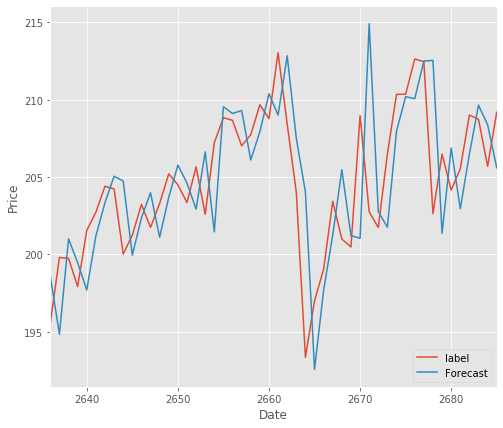

In [32]:
df['label'].tail(50).plot()
df['Forecast'].tail(50).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Results

As you can see in the results of the Notebook even if the models seem to be not to bad, they are. So if you look closer, they just mimic what happend the day before. From that we can see that a regression model is not good enough to predict stock prices. To do that you should try to use other models and most important its not enough to use only past stock data. Therefore you could try to use Sentiment Analysis on twitter or news data to improve the model.